# Exploration of the Global disaster events dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.basemap import Basemap

## Explore single datasets

### Drought

In [29]:
datasets_path = './datasets/disasters/Drought_clean.csv'
df = pd.read_csv(datasets_path)
df.head(2)

,Description,Alertlevel,Alertscore,Episodealertscore,Country,Fromdate,Todate,Severity (km2),Iso3,Gdacs id,Duration (days),Impact,Longitude,Latitude
0,"Green Drought in Germany, Denmark, France, Lat...",Green,1.0,0.25,"Germany, Denmark, France, Latvia, Poland, Sweden",2017-07-21,2019-02-09 15:07:00,80936.0,DEU,DR 1012168,569.0,Minor impact for agricultural drought in 80936...,11.087,53.882
1,Green Drought in Uzbekistan from: 21 Nov 2017 ...,Green,1.0,0.75,Uzbekistan,2017-11-21,2018-09-06 09:57:00,18686.0,UZB,DR 1012172,289.0,Minor impact for agricultural drought in 18686...,65.500,40.996


In [30]:
df = df.rename(columns=lambda x: x.strip().lower())
valuable_cols = ['description', 'alertscore', 'country', 'fromdate', 'todate', 'severity (km2)', 'duration (days)', 'impact', 'longitude', 'latitude']
df = df[valuable_cols]
df.head(2)

,description,alertscore,country,fromdate,todate,severity (km2),duration (days),impact,longitude,latitude
0,"Green Drought in Germany, Denmark, France, Lat...",1.0,"Germany, Denmark, France, Latvia, Poland, Sweden",2017-07-21,2019-02-09 15:07:00,80936.0,569.0,Minor impact for agricultural drought in 80936...,11.087,53.882
1,Green Drought in Uzbekistan from: 21 Nov 2017 ...,1.0,Uzbekistan,2017-11-21,2018-09-06 09:57:00,18686.0,289.0,Minor impact for agricultural drought in 18686...,65.500,40.996


In [10]:
df['alertscore'].value_counts()

alertscore
1.0    198
2.0     36
3.0      6
Name: count, dtype: int64

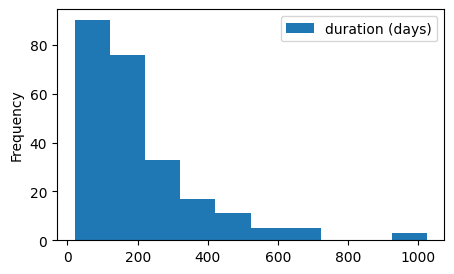

In [11]:
ax = df.plot.hist(column=['duration (days)'], figsize=(5,3))
plt.show()

In [ ]:
# get only USA droughts until 2022
df = df[df['fromdate'] <= '2022-12-31']
df = df[df['country'].str.contains('United States')]

140

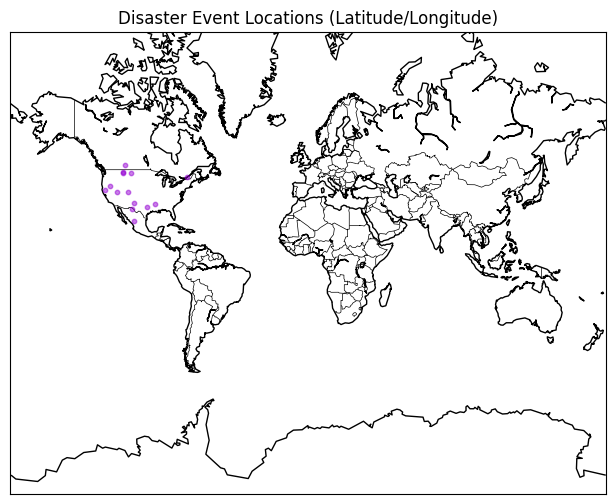

In [32]:
plt.figure(figsize=(10,6))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries()
x, y = m(df['longitude'].values, df['latitude'].values)
m.scatter(x, y, s=10, c='darkviolet', alpha=0.5, zorder=5)
plt.title('Disaster Event Locations (Latitude/Longitude)')
plt.show()

In [33]:
print(df)

                                           description  alertscore  \
9    Green Drought in United States from: 21 May 20...         1.0   
12   Green Drought in United States from: 21 May 20...         1.0   
51   Green Drought in Canada, United States from: 2...         1.0   
56   Green Drought in United States from: 21 Dec 20...         1.0   
72   Green Drought in Mexico, United States from: 2...         1.0   
97   Green Drought in Canada, United States from: 2...         1.0   
112  Orange Drought in Mexico, United States from: ...         2.0   
114  Green Drought in Canada, United States from: 2...         1.0   
116  Orange Drought in Mexico, United States from: ...         2.0   
134  Green Drought in United States from: 21 Apr 20...         1.0   
151  Green Drought in United States from: 21 Mar 20...         1.0   
153  Green Drought in Canada, United States from: 2...         1.0   
165  Green Drought in United States from: 21 Sep 20...         1.0   
166  Green Drought i

### Earthquake

In [14]:
datasets_path = './datasets/disasters/Earthquake_clean.csv'
df = pd.read_csv(datasets_path)
df.head(2)

,description,alertlevel,alertscore,episodealertlevel,episodealertscore,country,fromdate,todate,source,iso3,Earthquake Magnitude (M),Capacity,Depth (km),longitude,latitude,Exposed Population (within 100 km)
0,Red M 6.4 Earthquake in Afghanistan at: 19 Jan...,Red,3.0,Red,3.0,Afghanistan,2000-01-19 00:00:00,2000-01-19 00:00:00,NEIC,AFG,6.4,-1,0.0,70.400,36.200,460000.0
1,Green M 4.9 Earthquake in Iran at: 14 Feb 2000...,Green,1.0,Green,0.5,Iran,2000-02-14 00:00:00,2000-02-14 00:00:00,NEIC,IRN,4.9,-1,0.0,58.175,35.217,440000.0


In [15]:
df = df.rename(columns=lambda x: x.strip().lower())
valuable_cols = ['description', 'alertscore', 'country', 'fromdate', 'todate', 'earthquake magnitude (m)', 'exposed population (within 100 km)', 'longitude', 'latitude']
df = df[valuable_cols]
df.head(2)

,description,alertscore,country,fromdate,todate,earthquake magnitude (m),exposed population (within 100 km),longitude,latitude
0,Red M 6.4 Earthquake in Afghanistan at: 19 Jan...,3.0,Afghanistan,2000-01-19 00:00:00,2000-01-19 00:00:00,6.4,460000.0,70.400,36.200
1,Green M 4.9 Earthquake in Iran at: 14 Feb 2000...,1.0,Iran,2000-02-14 00:00:00,2000-02-14 00:00:00,4.9,440000.0,58.175,35.217


In [16]:
df['alertscore'].value_counts()

alertscore
1.0    20056
2.0      193
3.0       41
Name: count, dtype: int64

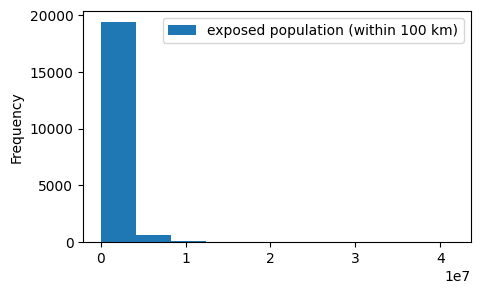

In [17]:
ax = df.plot.hist(column=['exposed population (within 100 km)'], figsize=(5,3))
plt.show()

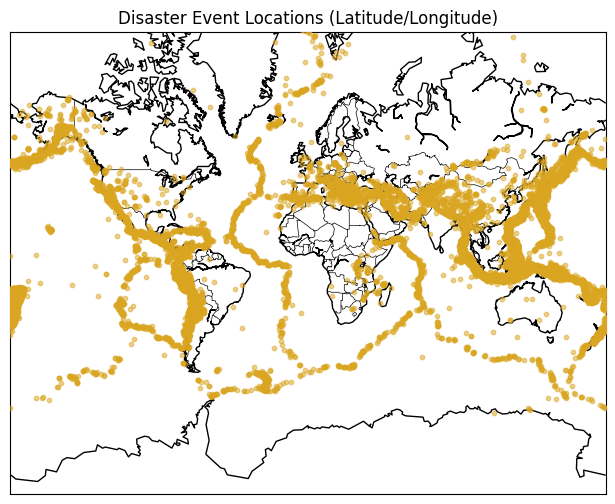

In [18]:
plt.figure(figsize=(10,6))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries()
x, y = m(df['longitude'].values, df['latitude'].values)
m.scatter(x, y, s=10, c='goldenrod', alpha=0.5, zorder=5)
plt.title('Disaster Event Locations (Latitude/Longitude)')
plt.show()

### Eruption

In [19]:
datasets_path = './datasets/disasters/Eruption_clean.csv'
df = pd.read_csv(datasets_path)
df.head(2)

,description,alertlevel,alertscore,episodealertlevel,episodealertscore,country,fromdate,todate,severity,source,iso3,GDACS ID,Exposed Population 30km,Exposed Population 100km,Max Volc. Explosivity Index VEI,Population Exposure Index PEI,longitude,latitude
0,Green Eruption Iskut-Unuk River Cones in Canad...,Green,1.0,Green,0.0,Canada,2011-09-20 18:00:00,2011-09-20 18:00:00,0.0,MONTREAL,-1,VO 360,-1.0,0.0,-1.0,-1.0,-130.550000,56.583333
1,"Green Eruption Hudson, Cerro in Chile-S at: 28...",Green,1.0,Green,0.0,Chile-S,2011-10-28 09:48:00,2011-10-28 09:48:00,0.0,BUENOS AIRES,-1,VO 484,-1.0,0.0,-1.0,-1.0,-72.966666,-45.900000


In [20]:
df = df.rename(columns=lambda x: x.strip().lower())
valuable_cols = ['description', 'alertscore', 'country', 'fromdate', 'todate', 'severity', 'exposed population 30km', 'exposed population 100km', 'population exposure index pei', 'longitude', 'latitude']
df = df[valuable_cols]
df.head(2)

,description,alertscore,country,fromdate,todate,severity,exposed population 30km,exposed population 100km,population exposure index pei,longitude,latitude
0,Green Eruption Iskut-Unuk River Cones in Canad...,1.0,Canada,2011-09-20 18:00:00,2011-09-20 18:00:00,0.0,-1.0,0.0,-1.0,-130.550000,56.583333
1,"Green Eruption Hudson, Cerro in Chile-S at: 28...",1.0,Chile-S,2011-10-28 09:48:00,2011-10-28 09:48:00,0.0,-1.0,0.0,-1.0,-72.966666,-45.900000


In [21]:
df['alertscore'].value_counts()

alertscore
1.0    46
2.0    12
3.0     3
Name: count, dtype: int64

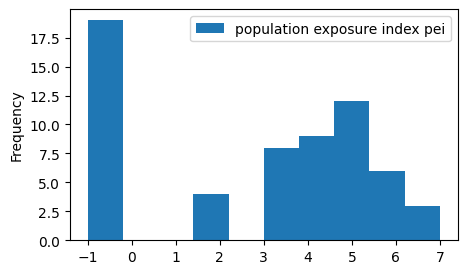

In [22]:
ax = df.plot.hist(column=['population exposure index pei'], figsize=(5,3))
# ax = df.plot.hist(column=['exposed population 100km'], bins=50, alpha=0.7)
plt.show()

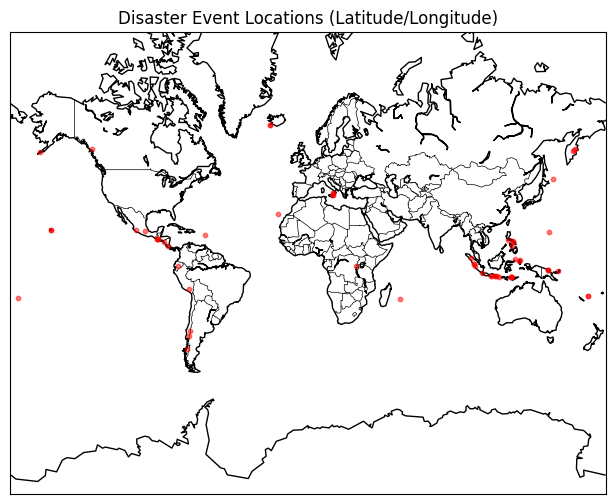

In [24]:
# Plot latitude and longitude counts on a world map for the current df
plt.figure(figsize=(10,6))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries()
x, y = m(df['longitude'].values, df['latitude'].values)
m.scatter(x, y, s=10, c='red', alpha=0.5, zorder=5)
plt.title('Disaster Event Locations (Latitude/Longitude)')
plt.show()

### Flood

In [64]:
datasets_path = './datasets/disasters/Flood_clean.csv'
df = pd.read_csv(datasets_path)
df.head(2)

,Unnamed: 0,description,alertlevel,alertscore,episodealertlevel,episodealertscore,country,fromdate,todate,severity (magnitude),source,iso3,Death,Displaced,GDACS_ID,longitude,latitude
0,0,ORANGE Flood in Mozambique from: 26 Jan 2000 0...,ORANGE,2.0,ORANGE,2.0,Mozambique,2000-01-26 00:00:00,2000-03-27 23:59:59,7.74,DFO,MOZ,929.0,733000.0,FL 1583,31.712,-27.822
1,1,GREEN Flood in Philippines from: 28 Jan 2000 0...,GREEN,1.0,GREEN,1.0,Philippines,2000-01-28 00:00:00,2000-02-01 23:59:59,4.92,DFO,PHL,23.0,20000.0,FL 1584,126.100,7.199


In [65]:
df = df.rename(columns=lambda x: x.strip().lower())
valuable_cols = ['description', 'alertscore', 'country', 'fromdate', 'todate', 'severity (magnitude)', 'death', 'displaced', 'longitude', 'latitude']
df = df[valuable_cols]
df.head(2)

,description,alertscore,country,fromdate,todate,severity (magnitude),death,displaced,longitude,latitude
0,ORANGE Flood in Mozambique from: 26 Jan 2000 0...,2.0,Mozambique,2000-01-26 00:00:00,2000-03-27 23:59:59,7.74,929.0,733000.0,31.712,-27.822
1,GREEN Flood in Philippines from: 28 Jan 2000 0...,1.0,Philippines,2000-01-28 00:00:00,2000-02-01 23:59:59,4.92,23.0,20000.0,126.100,7.199


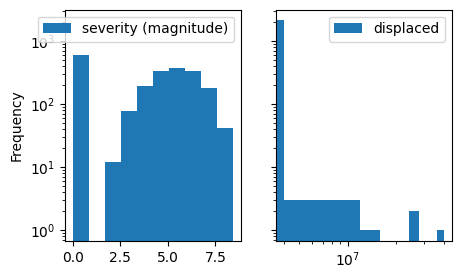

In [66]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1 = df.plot.hist(column=['severity (magnitude)'], figsize=(5,3), ax=ax1)
ax2 = df.plot.hist(column=['displaced'], figsize=(5,3), ax=ax2)
ax2.loglog()
plt.show()

In [67]:
df['alertscore'].value_counts()

alertscore
1.0    1826
2.0     249
3.0      51
Name: count, dtype: int64

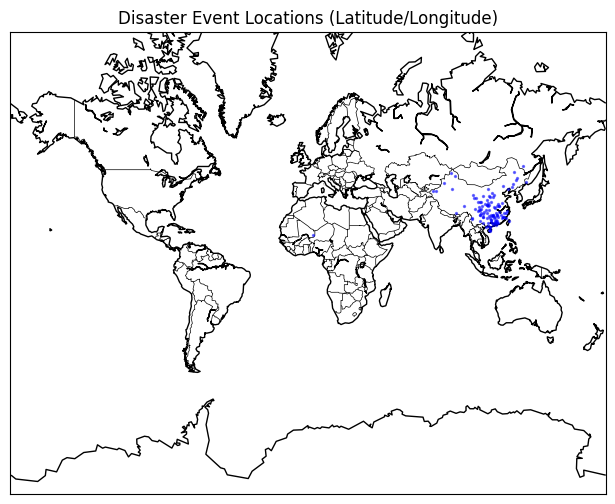

In [69]:
plt.figure(figsize=(10,6))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries()
x, y = m(df['longitude'].values, df['latitude'].values)
m.scatter(x, y, s=2, c='blue', alpha=0.5, zorder=5)
plt.title('Disaster Event Locations (Latitude/Longitude)')
plt.show()

### Forest Fires

In [152]:
datasets_path = './datasets/disasters/Forest_Fires_clean.csv'
df = pd.read_csv(datasets_path)
df.head(2)

,description,alertlevel,alertscore,episodealertscore,country,fromdate,todate,severity (ha),iso3,GDACS ID,People affected,Duration (days),longitude,latitude
0,Green Forest fires in Laos from: 23 Feb 2021 t...,Green,1.0,1.0,Laos,2021-02-23,2021-03-23,5070.0,LAO,WF 1000144,0.0,28.0,105.659937,17.335162
1,Green Forest fires in India from: 25 Feb 2021 ...,Green,1.0,1.0,India,2021-02-25,2021-03-11,9866.0,IND,WF 1000128,35445.0,14.0,85.875408,22.856787


In [153]:
df = df.rename(columns=lambda x: x.strip().lower())
valuable_cols = ['description', 'alertscore', 'country', 'fromdate', 'todate', 'severity (ha)', 'people affected', 'duration (days)', 'longitude', 'latitude']
df = df[valuable_cols]
df.head(2)

,description,alertscore,country,fromdate,todate,severity (ha),people affected,duration (days),longitude,latitude
0,Green Forest fires in Laos from: 23 Feb 2021 t...,1.0,Laos,2021-02-23,2021-03-23,5070.0,0.0,28.0,105.659937,17.335162
1,Green Forest fires in India from: 25 Feb 2021 ...,1.0,India,2021-02-25,2021-03-11,9866.0,35445.0,14.0,85.875408,22.856787


In [55]:
df['alertscore'].value_counts()

alertscore
1.0    3050
2.0       1
Name: count, dtype: int64

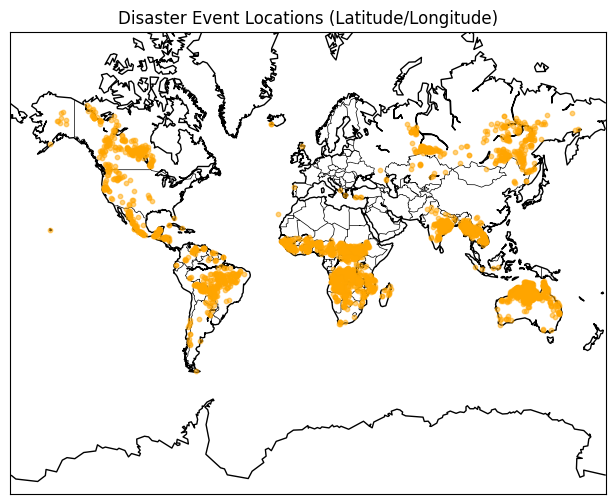

In [154]:
plt.figure(figsize=(10,6))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries()
x, y = m(df['longitude'].values, df['latitude'].values)
m.scatter(x, y, s=2, c='orange', alpha=0.5, zorder=5)
plt.title('Disaster Event Locations (Latitude/Longitude)')
plt.show()

### Tropical Cyclone

In [160]:
datasets_path = './datasets/disasters/Tropical_Cyclone_clean.csv'
df = pd.read_csv(datasets_path)
df.head(2)

,description,alertlevel,alertscore,episodealertlevel,episodealertscore,fromdate,todate,severity,severitytext,source,iso3,GDACS ID,Exposed countries,Exposed population,Maximum wind speed (km/h),Maximum storm surge (m),Vulnerability,longitude,latitude,Category
0,Red Tropical Cyclone NARGIS-08 off-shore from:...,Red,3.0,Green,1.0,2008-04-28 06:00:00,2008-05-03 12:00:00,74.029824,Tropical Storm (maximum wind speed of 212 km/h),JTWC,,TC 10238,Off-shore,7000000.0,74.0,-1.0,-1,97.5,18.299999,-1.0
1,Orange Tropical Cyclone SONGDA-11 in Japan fro...,Orange,2.0,Green,1.0,2011-05-22 00:00:00,2011-05-29 12:00:00,64.373760,Tropical Depression (maximum wind speed of 259...,JRC,,TC 24054,Japan,0.0,64.0,-1.0,Low,136.6,34.400000,-1.0


In [161]:
df = df.rename(columns=lambda x: x.strip().lower())
valuable_cols = ['description', 'alertscore', 'fromdate', 'todate', 'severity', 'exposed countries', 'exposed population', 'vulnerability', 'longitude', 'latitude']
df = df[valuable_cols]
df.head(2)

,description,alertscore,fromdate,todate,severity,exposed countries,exposed population,vulnerability,longitude,latitude
0,Red Tropical Cyclone NARGIS-08 off-shore from:...,3.0,2008-04-28 06:00:00,2008-05-03 12:00:00,74.029824,Off-shore,7000000.0,-1,97.5,18.299999
1,Orange Tropical Cyclone SONGDA-11 in Japan fro...,2.0,2011-05-22 00:00:00,2011-05-29 12:00:00,64.373760,Japan,0.0,Low,136.6,34.400000


In [85]:
locs_lists = map(lambda x: x.strip().split(','), df['exposed countries'].values)
locs = []
for list in locs_lists:
    for el in list:
        locs.append(el.strip())
locs = set(locs)
len(locs)

118

In [149]:
df['alertscore'].value_counts()

alertscore
1.0    312
2.0     57
3.0     36
Name: count, dtype: int64

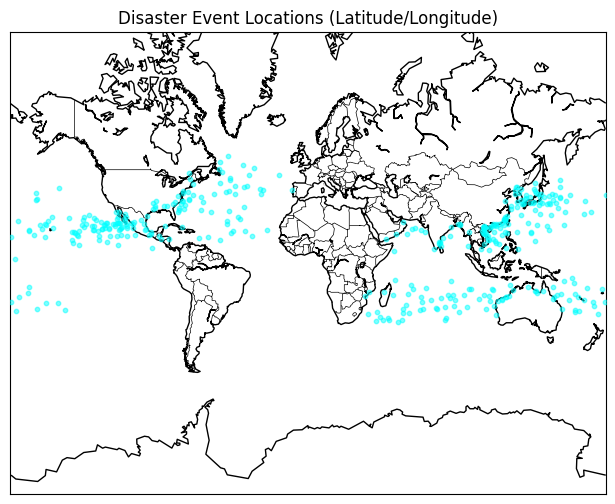

In [163]:
plt.figure(figsize=(10,6))
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.drawcountries()
x, y = m(df['longitude'].values, df['latitude'].values)
m.scatter(x, y, s=10, c='cyan', alpha=0.5, zorder=5)
plt.title('Disaster Event Locations (Latitude/Longitude)')
plt.show()

## Merge all datasets

In [6]:
events = ['Drought', 'Earthquake', 'Eruption', 'Flood', 'Forest_Fires', 'Tropical_Cyclone']
datasets_path = './datasets/disasters/'
df = pd.DataFrame()
for e in events:
    df_e = pd.read_csv(f"{datasets_path}{e}_clean.csv")
    df_e.insert(0, 'event_type', e)
    print(f"{e}: {df_e.shape}")
    df = pd.concat([df, df_e], ignore_index=True)

Drought: (240, 15)
Earthquake: (20290, 17)
Eruption: (61, 19)
Flood: (2126, 18)
Forest_Fires: (3051, 15)
Tropical_Cyclone: (405, 21)


In [3]:
df.head()

,event_type,Description,Alertlevel,Alertscore,Episodealertscore,Country,Fromdate,Todate,Severity (km2),Iso3,...,GDACS_ID,severity (ha),People affected,severitytext,Exposed countries,Exposed population,Maximum wind speed (km/h),Maximum storm surge (m),Vulnerability,Category
0,Drought,"Green Drought in Germany, Denmark, France, Lat...",Green,1.0,0.25,"Germany, Denmark, France, Latvia, Poland, Sweden",2017-07-21,2019-02-09 15:07:00,80936.0,DEU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drought,Green Drought in Uzbekistan from: 21 Nov 2017 ...,Green,1.0,0.75,Uzbekistan,2017-11-21,2018-09-06 09:57:00,18686.0,UZB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Drought,Green Drought in Brazil from: 21 Dec 2017 to:...,Green,1.0,0.50,Brazil,2017-12-21,2018-09-06 09:57:00,87604.0,BRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Drought,Orange Drought in Australia from: 21 Feb 2018 ...,Orange,2.0,1.00,Australia,2018-02-21,2018-11-24 16:27:00,142608.0,AUS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Drought,Orange Drought in Madagascar from: 21 Mar 2018...,Orange,2.0,1.50,Madagascar,2018-03-21,2018-09-13 13:57:00,68692.0,MDG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data preparation

operations to be carried out:
- merge similar cols
- remove all rows with NaN data
- encode state, lat/long 
- one-hot encode disaster_type

merge cols

In [15]:
print(len(set(df.columns.to_list())))
print(len(set(map(lambda l: l.lower(), df.columns.to_list()))))

51
40


remove NaN rows

In [10]:
df.isna().sum()

event_type                                0
Description                           25933
Alertlevel                            25933
Alertscore                            25933
Episodealertscore                     25933
Country                               25933
Fromdate                              25933
Todate                                25933
Severity (km2)                        25933
Iso3                                  25933
Gdacs id                              25933
Duration (days)                       22882
Impact                                25933
Longitude                             25933
Latitude                              25933
description                             240
alertlevel                              240
alertscore                              240
episodealertlevel                      3291
episodealertscore                       240
country                                2451
fromdate                                240
todate                          

In [8]:
print("Final dataset size: ", int(df.size / len(df.columns)))

Final dataset size:  26173
